In [605]:
import astropy.io.fits as fits
import numpy as np
import glob
from matplotlib import pyplot as plt
from astropy.io import ascii
from astroquery.mast import Observations
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
from astropy.visualization import quantity_support
from scipy.optimize import curve_fit

# program ID GO-10775.
# 

# Final Project Due December 12

## Part 1: Globular Cluster MS Fitting and Distance Determination

1. Enter the HLA website at http://hla.stsci.edu

2. Perform an advanced search for observations with the Wide Field Planetary Camera 2 
(WFPC2) taken as part of program ID GO-10775. You only need to enter the program 
number in the web form.

3. Click on the “Inventory” tab so you can see a list of all of the observations. You will see 
entries for the following Milky Way globular clusters: NGC 104, NGC 362, NGC 3201, NGC 
4833, NGC 5139, NGC 6121, NGC 6218, NGC 6254, NGC 6362, NGC 6397, NGC 6656, NGC 
6752, NGC 6809, and NGC 6838.

4. Download the photometry available from the “PlotCat” link for clusters with “F606W/F814W” in the “Spectral_Element” column.

In [2]:
Observations.get_product_list_async('10775')

[<Response [200]>]

In [3]:
#obs_tabl = Observations.query_criteria(obs_collection='HLA', instrument='WFPC2', proposal_id='10775', filters='F814W;F606W', calib_level=4)
#obs_tabl

In [4]:
data_names = glob.glob('/mnt/c/Users/panda/Documents/Stars/photometry_data/hst*')

In [5]:
#  Object      Pixel Position      ICRS Coordinates        f606w    f814w    f606w    f814w
#      ID       X          Y       RA          DEC     | MagAP2----------| TotMag----------| CI--------------| Flags-----------
column_names = ['Object ID', 'X', 'Y', 'RA', 'DEC', 'f606w_MagAP2', 'f814w_MagAP2', 
                'f606w_TotMag', 'f814w_TotMag', 'f606w_CI', 'f814w_CI', 'f606w_flags', 'f814w_flags']

In [745]:
Table(data=ascii.read(data_names[0]), names=column_names)

Object ID,X,Y,RA,DEC,f606w_MagAP2,f814w_MagAP2,f606w_TotMag,f814w_TotMag,f606w_CI,f814w_CI,f606w_flags,f814w_flags
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
4,347.539,127.64,15.5443692,-70.8701632,20.227,20.206,20.057,20.022,0.948,0.983,0,0
9,323.496,138.108,15.5464065,-70.8698719,21.632,21.609,21.462,21.425,1.018,1.002,0,0
19,761.821,169.252,15.5092528,-70.8690124,21.411,21.226,21.241,21.042,0.951,1.041,0,0
20,838.922,169.352,15.5027178,-70.8690099,22.843,23.161,22.673,22.977,1.011,1.166,0,8
22,409.955,171.595,15.5390762,-70.8689434,21.424,21.293,21.254,21.109,0.833,0.973,16,0
23,217.775,173.345,15.5553649,-70.8688906,21.94,21.861,21.77,21.677,1.0,1.038,0,0
24,553.252,175.409,15.5269305,-70.8688396,22.305,22.851,22.135,22.667,1.033,1.109,0,0
25,171.695,175.826,15.5592703,-70.8688205,23.211,23.649,23.041,23.465,1.024,1.013,0,8
26,392.844,177.636,15.5405262,-70.8687753,23.249,23.482,23.079,23.298,0.963,0.991,0,8


In [7]:
data_names[6]

'/mnt/c/Users/panda/Documents/Stars/photometry_data/hst_10775_60_wfpc2_multiwave_wf_daophot_trm.cat'

5.	For	each	cluster,	plot	a	color-magnitude	diagram	(CMD)	with	(f606w_TOTMAG)	–	
(f814w_TOTMAG)	on	the	abscissa	and	f606w_TOTMAG	on	the	ordinate.	Make	sure	to	plot	
the	vertical	axis	flipped	with	brighter	magnitudes	at	the	top	of	the	axis.	Scale	the	CMD	so	
that	you	focus	on	the	main	sequence	and	that	you	use	the	same	relative	range	of	color	and	
magnitude	for	all	of	the	clusters.

In [744]:
def plot_colormag(tbl, show=True):
    abscissa = tbl['f606w_TotMag'] - tbl['f814w_TotMag']
    ordinate = tbl['f606w_TotMag']

    plt.gca().invert_yaxis()
    plt.scatter(abscissa, ordinate, marker='.', label=tbl.meta['comments'][12].split(':')[1])

    plt.xlabel('Color (f606w - f814w)')
    plt.ylabel('Apparent Magnitude (f606w)')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(left=0.01, right=11)
    #plt.ylim(top=10, bottom=25)
    
    plt.legend()
    #plt.ylim(bottom=26, top=22)
    if show:
        plt.show()

In [618]:
tbl = Table(data=ascii.read(data_names[6]), names=column_names)
abscissa = tbl['f606w_TotMag'] - tbl['f814w_TotMag']
ordinate = tbl['f606w_TotMag']

In [619]:
H, abs_edge, ord_edge = np.histogram2d(abscissa, ordinate, bins=10)

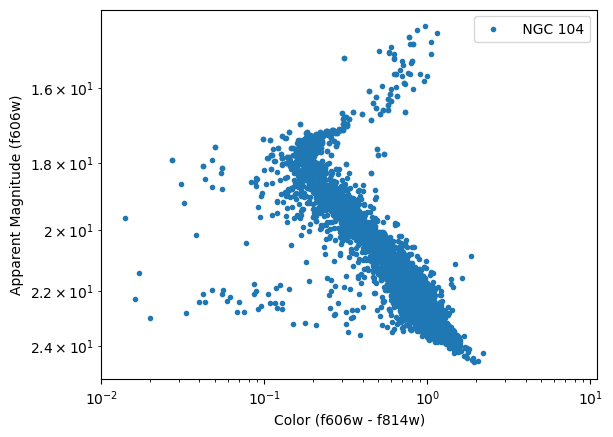

In [620]:
plot_colormag(tbl, show=False)

#for ll in ord_edge:
#    plt.axhline(ll, color='red')
#for bb in abs_edge:
#    plt.axvline(bb, color='red')

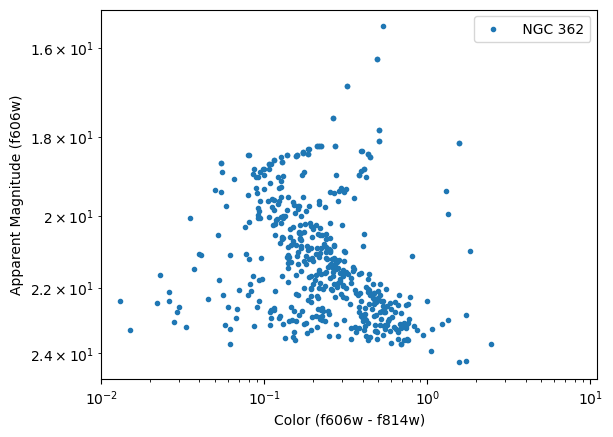

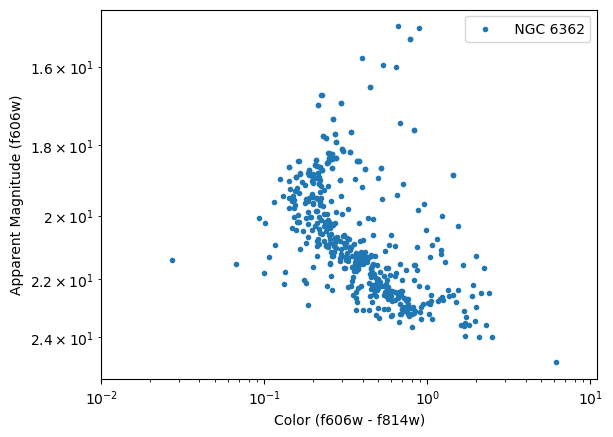

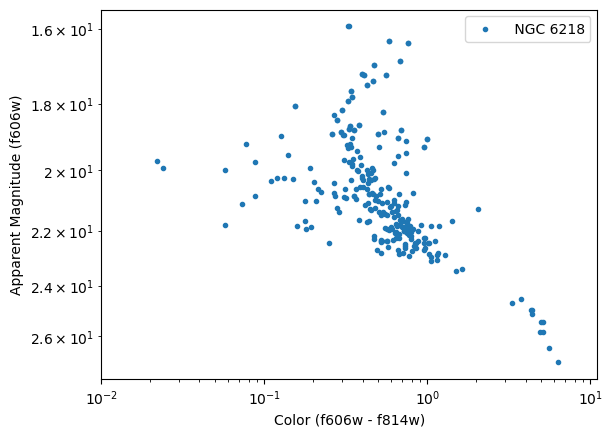

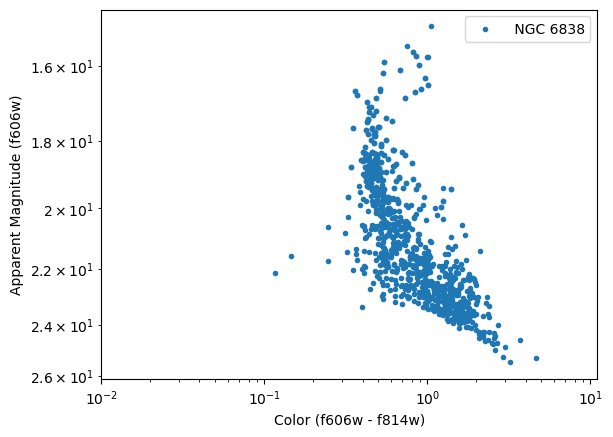

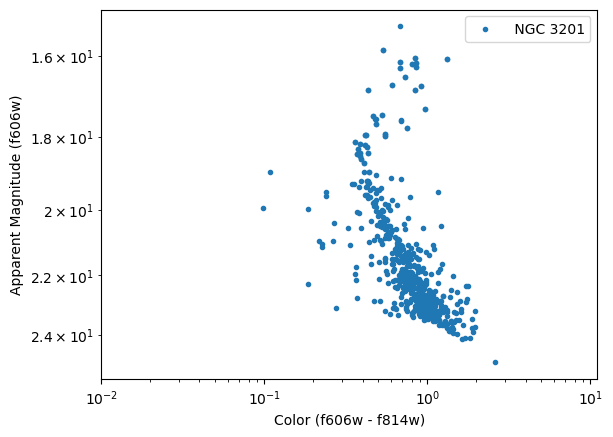

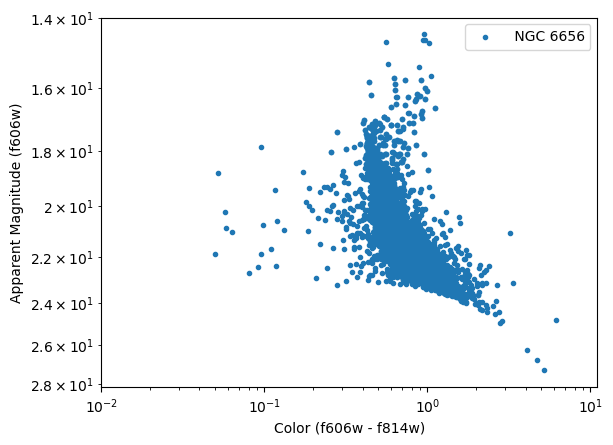

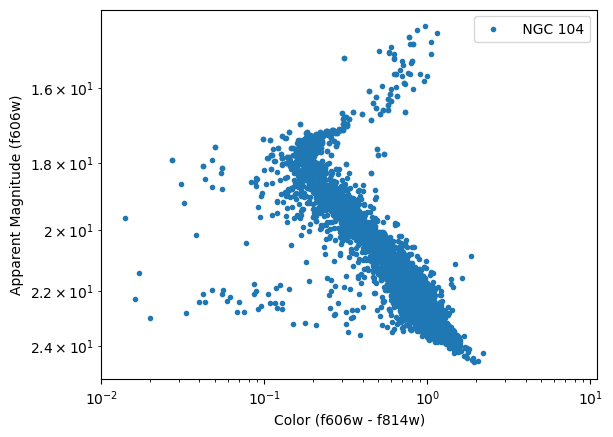

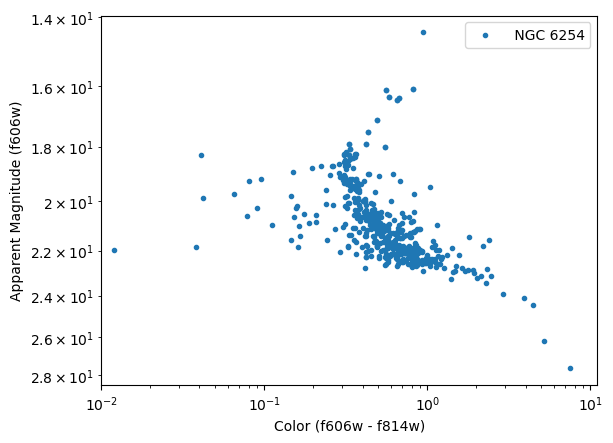

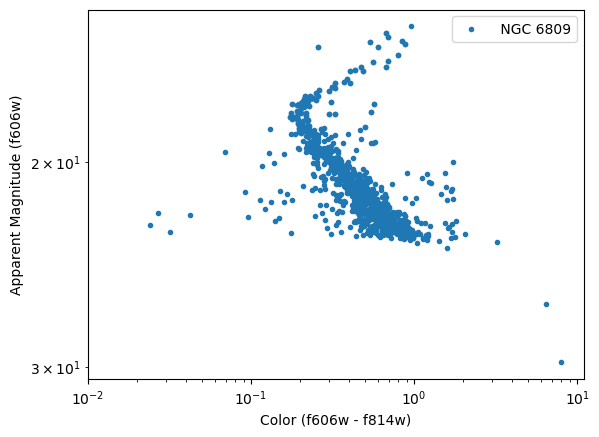

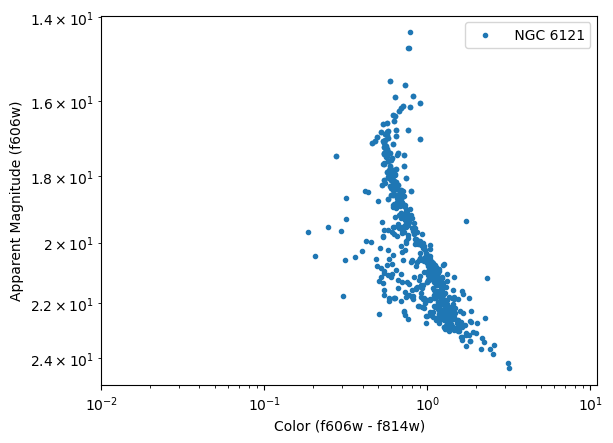

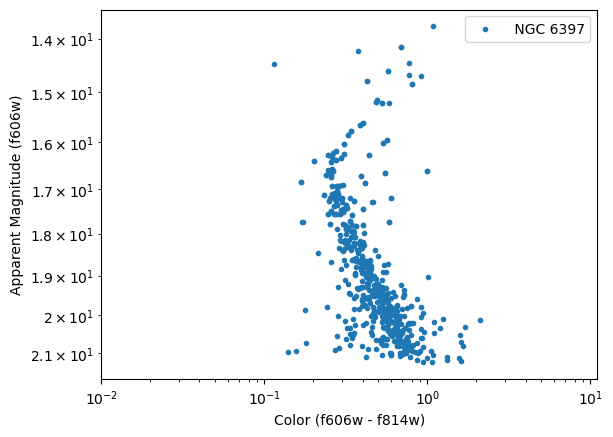

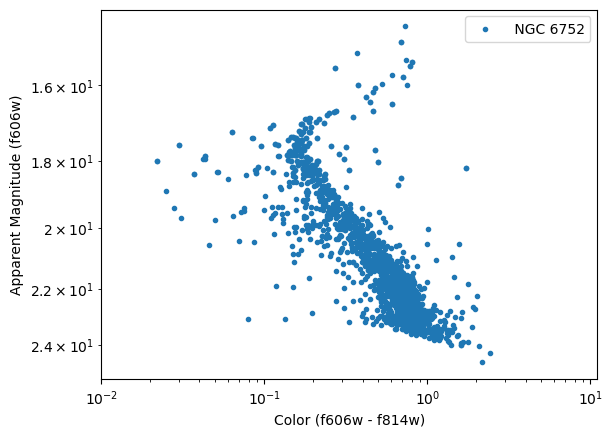

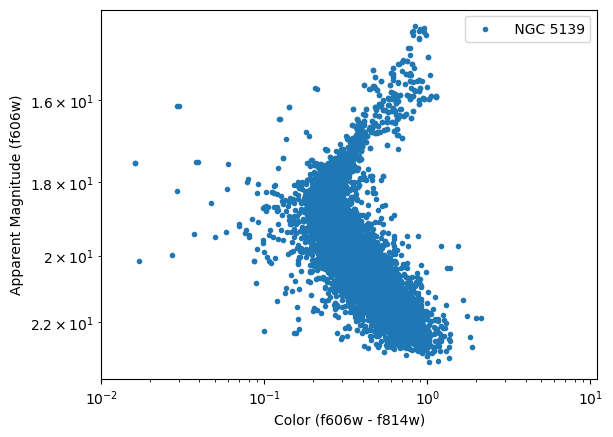

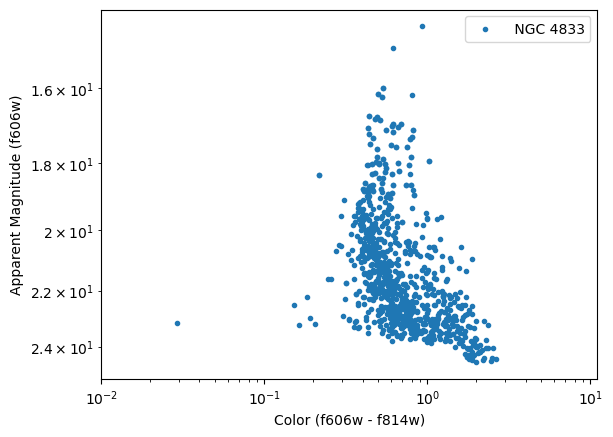

In [621]:
for dat in data_names:
    tbl = Table(data=ascii.read(dat), names=column_names)
    #print(len(tbl))
    plot_colormag(tbl)

6. Select one of the clusters as your standard reference cluster – choose the one that has the  best determined and populated main sequence.

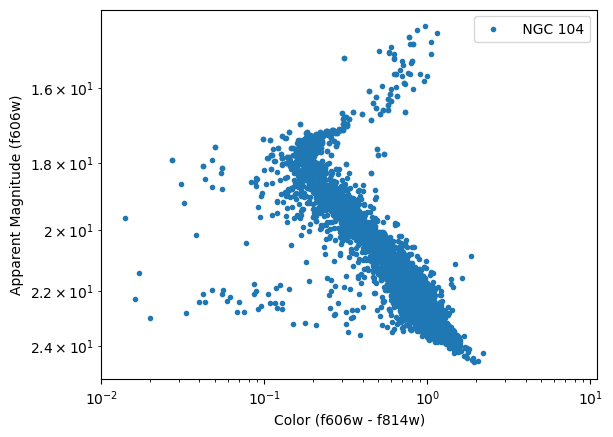

In [625]:
# NGC104
tbl_ref = Table(data=ascii.read(data_names[6]), names=column_names)
#plot_colormag(tbl_ref)
dist_ref = 4.45*u.kpc
dist_ref_err = 0.01*u.kpc

abscissa = tbl_ref['f606w_TotMag'] - tbl_ref['f814w_TotMag']
ordinate = tbl_ref['f606w_TotMag']
plt.gca().invert_yaxis()
plt.scatter(abscissa, ordinate, marker='.', label=tbl_ref.meta['comments'][12].split(':')[1])

plt.xlabel('Color (f606w - f814w)')
plt.ylabel('Apparent Magnitude (f606w)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(left=0.01, right=11)
#plt.ylim(top=10, bottom=25)
plt.legend()

7. Assume all of the clusters have the same metallicity and reddening and determine the  (vertical) magnitude shift required to match the lower (unevolved) main sequences of all of  the other clusters to that of the reference cluster. Do this as quantitatively as you can. This  represents an approximate distance modulus difference between these clusters in the  F606W filter pass band, which is close to the ground-based Johnson V band. Determine an  error value for each distance modulus difference using a method that is as quantitative as  possible. If you are not able to measure a distance modulus difference for a given cluster,  please comment on the reason(s) for this.


The lower main sequence stars will have the highest magnitudes, as less luminous stars have higher magnitudes, and brighter stars have lower magnitudes.

In [606]:
def powerlaw_fit(x, a, k):
    return a*x**k

[0.05648561 0.003996  ]


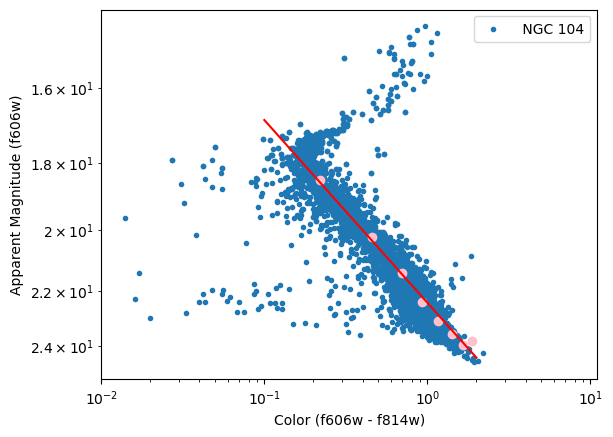

In [651]:
abscissa = tbl_ref['f606w_TotMag'] - tbl_ref['f814w_TotMag']
ordinate = tbl_ref['f606w_TotMag']
plt.gca().invert_yaxis()
plt.scatter(abscissa, ordinate, marker='.', label=tbl_ref.meta['comments'][12].split(':')[1])

color_bins = np.linspace(0.1, 2.0, num=9)

ooo_lis = []
aaa_lis = []

for ii in range(len(color_bins)-1):
    con = ordinate[np.logical_and(np.greater(abscissa, color_bins[ii]), np.less(abscissa, color_bins[ii+1]))]
    ooo = np.mean(con)
    aaa = np.mean([color_bins[ii], color_bins[ii+1]])
    plt.scatter(aaa, ooo, color='pink')
    ooo_lis.append(ooo)
    aaa_lis.append(aaa)
    if np.isfinite(ooo) and np.isfinite(aaa):
            ooo_lis.append(ooo)
            aaa_lis.append(aaa)

plt.xlabel('Color (f606w - f814w)')
plt.ylabel('Apparent Magnitude (f606w)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(left=0.01, right=11)
#plt.ylim(top=10, bottom=25)
plt.legend()


fit, pcov = curve_fit(powerlaw_fit, aaa_lis, ooo_lis)
app = powerlaw_fit(color_bins, fit[0], fit[1])

plt.plot(color_bins, app, color='red')
perr = np.sqrt(np.diag(pcov))
print(perr)

In [652]:
curve_fit(powerlaw_fit, aaa_lis, ooo_lis)

(array([22.41840156,  0.12452229]),
 array([[3.19062421e-03, 1.16422991e-05],
        [1.16422991e-05, 1.59679821e-05]]))

In [746]:
def fit_mains_sequence(tbl, show=True):
    abscissa = tbl['f606w_TotMag'] - tbl['f814w_TotMag']
    ordinate = tbl['f606w_TotMag']
    plt.gca().invert_yaxis()
    plt.scatter(abscissa, ordinate, marker='.', label=tbl.meta['comments'][12].split(':')[1])
    
    color_bins = np.linspace(0.2, 1.5, num=30)[:]
    #color_bins = np.linspace(-1.5, 0.5, num=20)
    
    aaa_lis = []
    ooo_lis = []
    ooo_sig = []
    
    for ii in range(len(color_bins)-1):
        con = ordinate[np.logical_and(np.greater(abscissa, color_bins[ii]), np.less(abscissa, color_bins[ii+1]))]
        ooo = np.mean(con)
        aaa = np.mean([color_bins[ii], color_bins[ii+1]])
        plt.scatter(aaa, ooo, color='pink')
        sig = np.std(con)
        if np.isfinite(ooo) and np.isfinite(aaa) and sig > 0:
            ooo_lis.append(ooo)
            aaa_lis.append(aaa)
            ooo_sig.append(sig)
    
    plt.xlabel('Color (f606w - f814w)')
    plt.ylabel('Apparent Magnitude (f606w)')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(left=0.01, right=11)
    #plt.ylim(top=10, bottom=25)
    plt.legend()
    
    #print(ooo_sig)
    fit, pcov = curve_fit(powerlaw_fit, aaa_lis, ooo_lis, sigma=ooo_sig)
    app = powerlaw_fit(color_bins, fit[0], fit[1])
    perr = np.sqrt(np.diag(pcov))
    #print(powerlaw_fit(1.0, fit[0], fit[1]))
    
    plt.plot(color_bins, app, color='red')
    
    if show:
        plt.show()
    return fit, perr

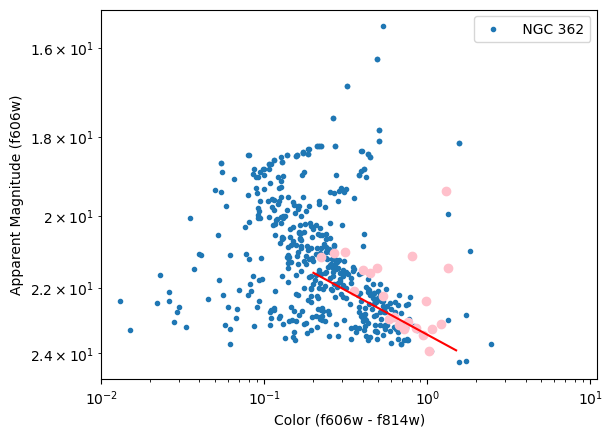

 NGC 362
[23.41467173  0.05106688]
[0.07434226 0.01263842]


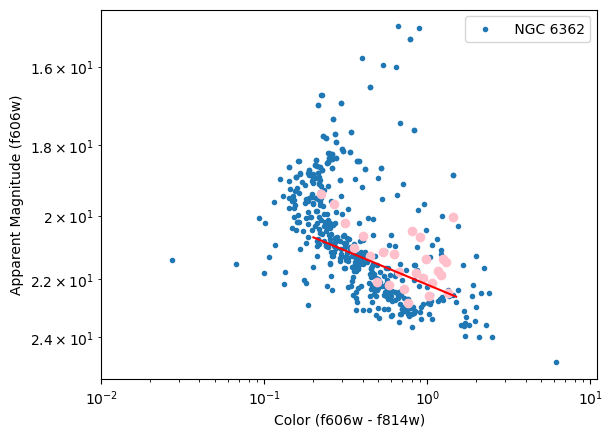

 NGC 6362
[22.17698158  0.04406948]
[0.08172314 0.01074793]


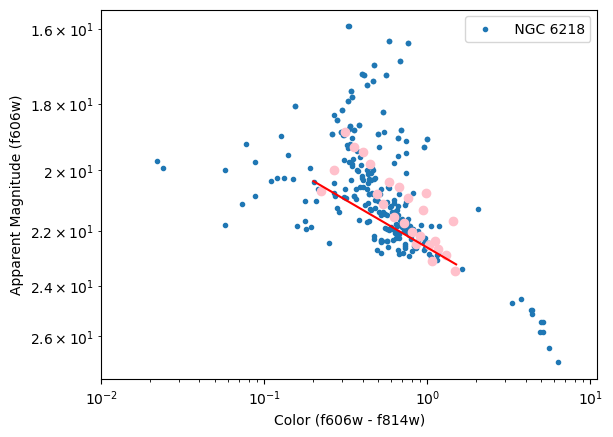

 NGC 6218
[22.59708506  0.06526307]
[0.08805672 0.00815588]


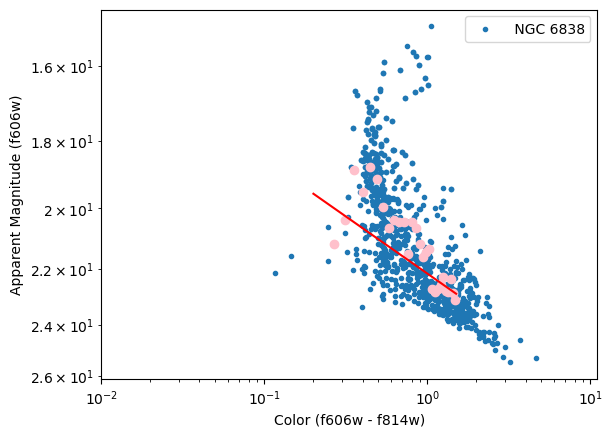

 NGC 6838
[22.15319068  0.07772031]
[0.15827766 0.01181475]


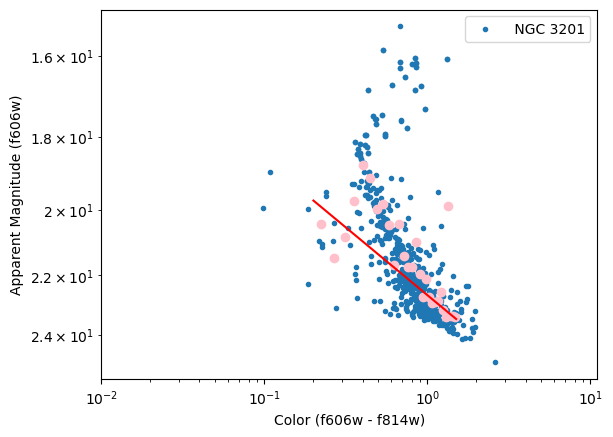

 NGC 3201
[22.64596412  0.08543081]
[0.09179309 0.00708827]


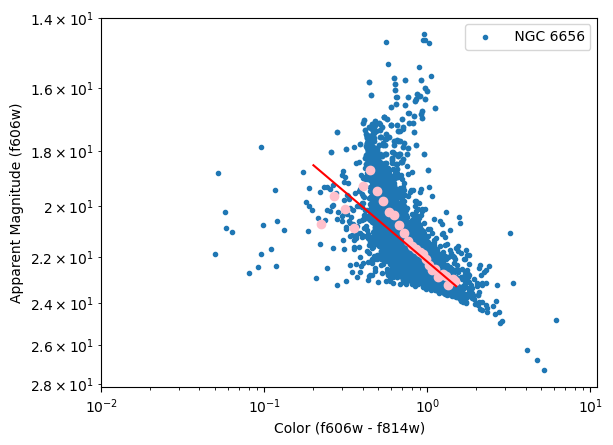

 NGC 6656
[22.20674223  0.11339436]
[0.08480847 0.00983913]


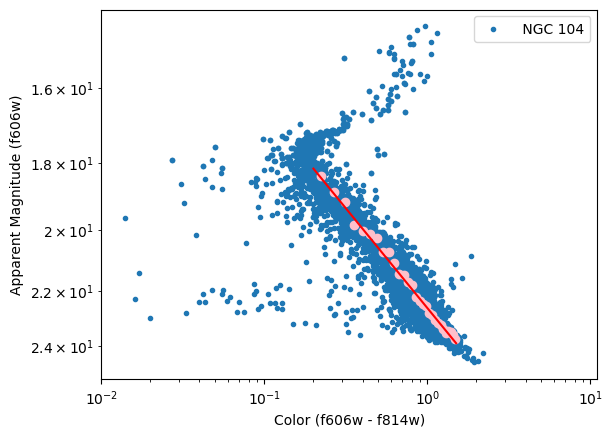

 NGC 104
[22.6074001   0.13598151]
[0.01876129 0.00207897]


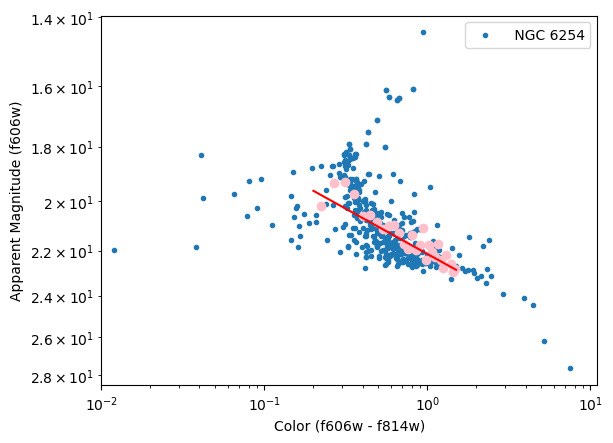

 NGC 6254
[22.14100061  0.0759166 ]
[0.04694438 0.00668601]


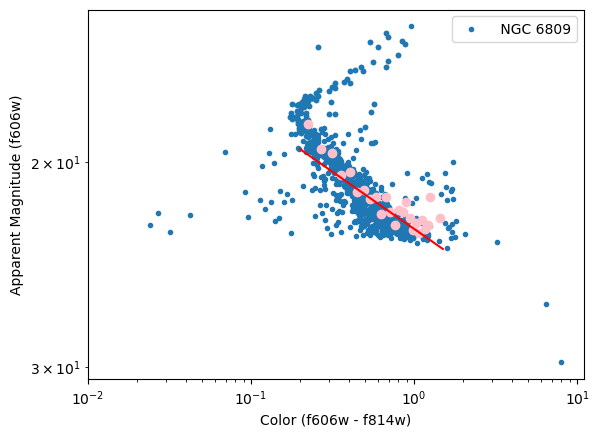

 NGC 6809
[22.832391    0.09818289]
[0.0337963  0.01113869]


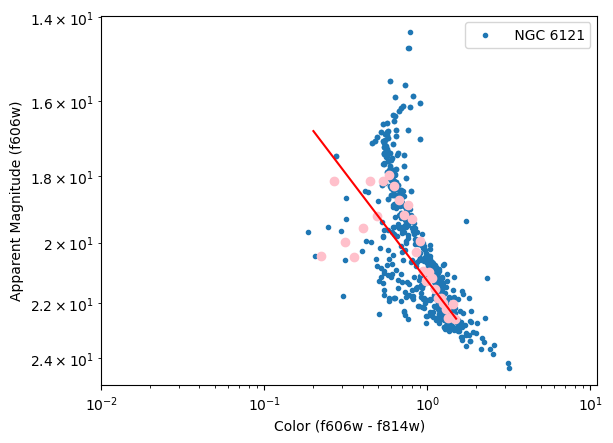

 NGC 6121
[21.2457266  0.1471234]
[0.10360722 0.0139396 ]


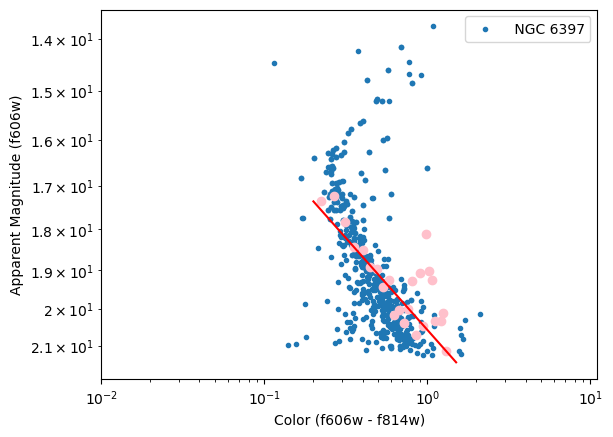

 NGC 6397
[20.55438706  0.10529301]
[0.06561162 0.01196348]


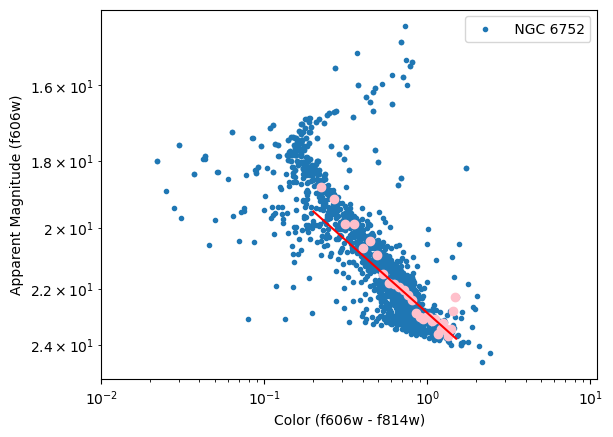

 NGC 6752
[22.83609635  0.09867917]
[0.06696742 0.01112868]


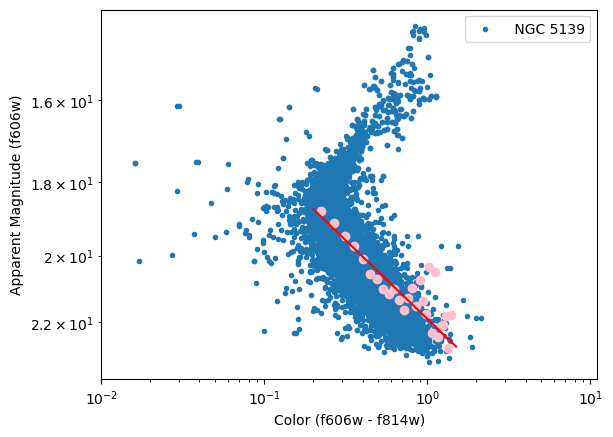

 NGC 5139
[21.89536199  0.09771466]
[0.06535761 0.00640575]


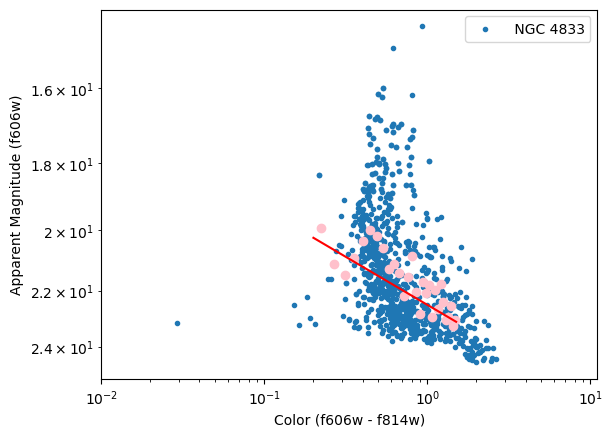

 NGC 4833
[22.47747565  0.06542103]
[0.07727311 0.0068531 ]


In [747]:
mods_fit = []
mods_fit_err = []

for dat in range(len(data_names)):
    tbl = Table(data=ascii.read(data_names[dat]), names=column_names)
    fit, perr = fit_mains_sequence(tbl)
    print(tbl.meta['comments'][12].split(':')[1])
    print(fit)
    print(perr)
    mods_fit.append(fit[0])
    mods_fit_err.append(perr[0])

In [705]:
mods_diff = np.zeros(len(data_names))
mods_diff_err = np.zeros(len(data_names))

print('Reference Cluster NGC 204')
print(mods_fit[6], mods_fit_err[6]) # NGC 104
mods_fit_ref = mods_fit[6]
mods_fit_err_ref = mods_fit_err[6]

for dat in range(len(data_names)):
    tbl = Table(data=ascii.read(data_names[dat]), names=column_names)
    print(tbl.meta['comments'][12].split(':')[1])
    
    mods_diff[dat] = mods_fit_ref - mods_fit[dat]
    mods_diff_err[dat] = np.sqrt(mods_fit_err_ref**2 + mods_fit_err[dat]**2)
    print(mods_diff[dat], mods_diff_err[dat])

Reference Cluster NGC 204
22.607400100912656 0.018761287945727415
 NGC 362
-0.8072716322061808 0.07667305463520756
 NGC 6362
0.43041851602669823 0.08384901211799807
 NGC 6218
0.010315039334130915 0.09003317225700472
 NGC 6838
0.4542094165906825 0.159385703927865
 NGC 3201
-0.0385640161282268 0.0936907506775934
 NGC 6656
0.4006578668400742 0.08685886258675947
 NGC 104
0.0 0.02653246786043457
 NGC 6254
0.4663994884988192 0.05055453428579899
 NGC 6809
-0.2249908955934785 0.03865456683883038
 NGC 6121
1.3616734994836115 0.10529217311757996
 NGC 6397
2.0530130409381186 0.06824127111338073
 NGC 6752
-0.22869625299622598 0.06954581957657935
 NGC 5139
0.7120381152218087 0.06799708138580525
 NGC 4833
0.12992445348822557 0.07951804555904934


 NGC 362


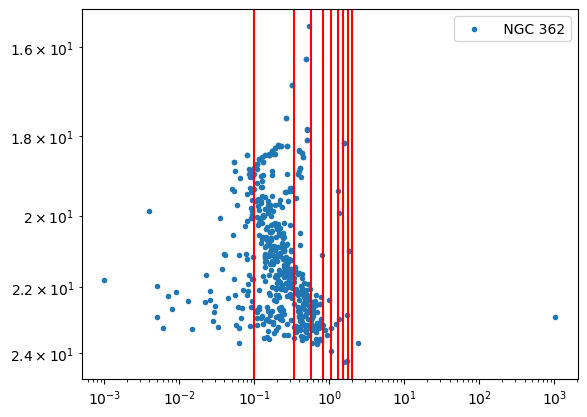

 NGC 6362


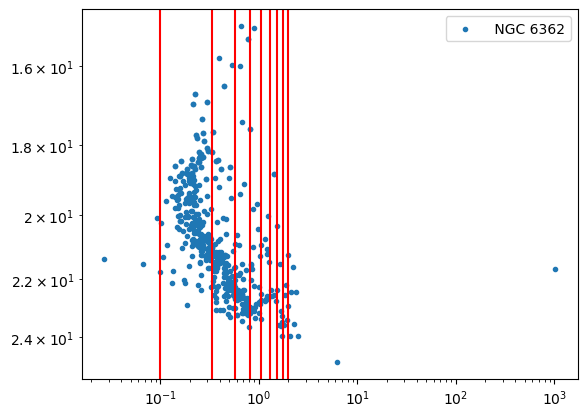

 NGC 6218


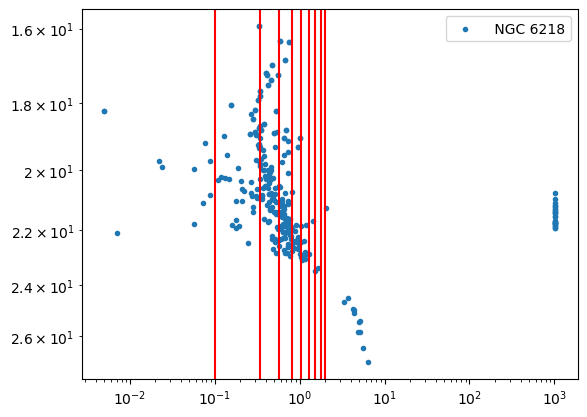

 NGC 6838


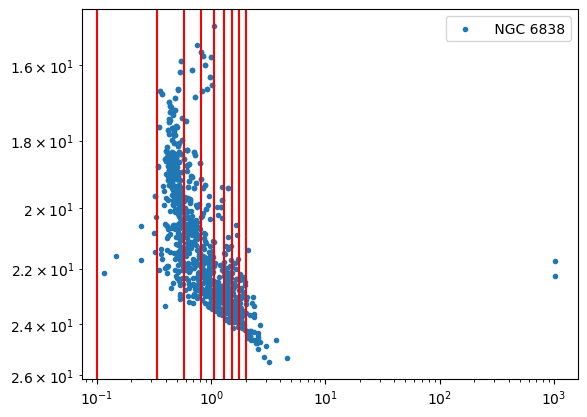

 NGC 3201


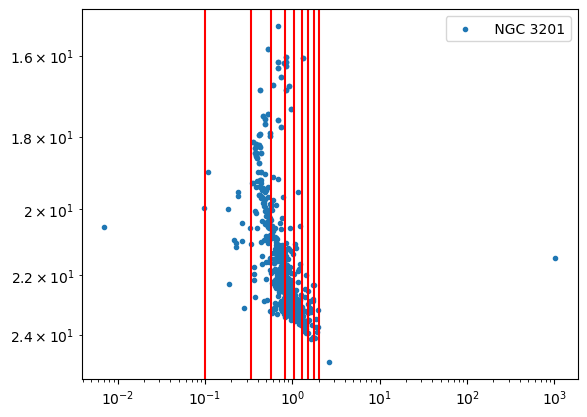

 NGC 6656


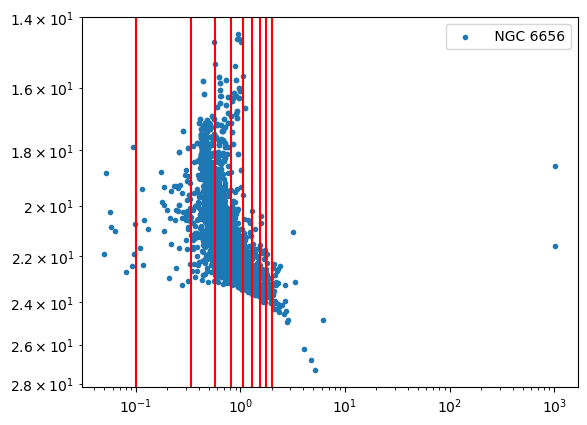

 NGC 104


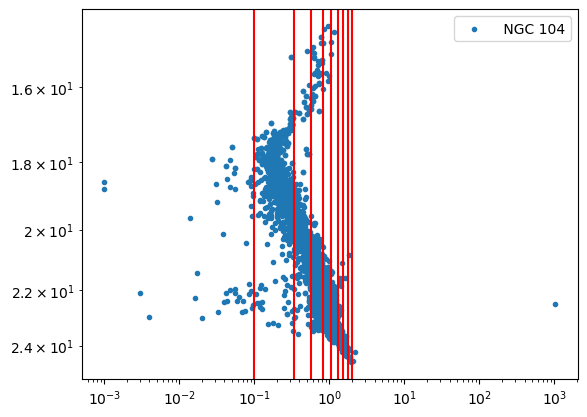

 NGC 6254


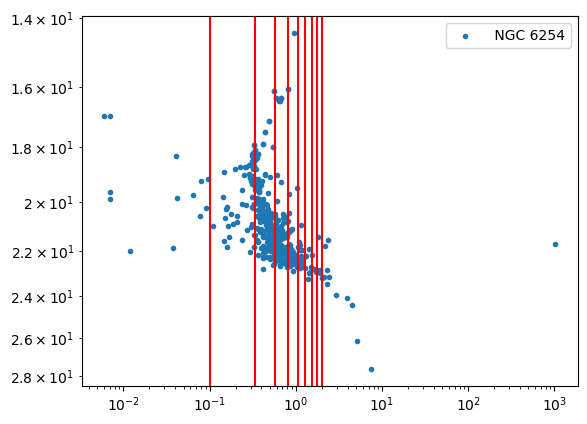

 NGC 6809


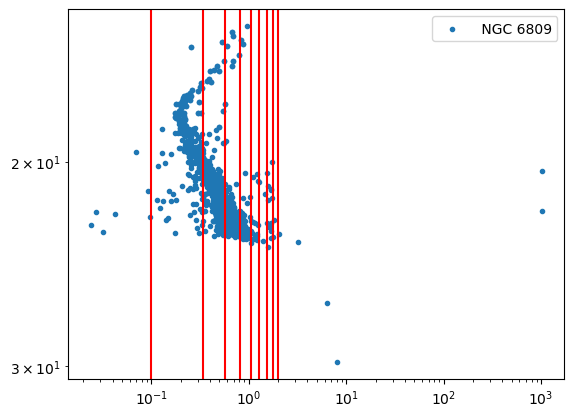

 NGC 6121


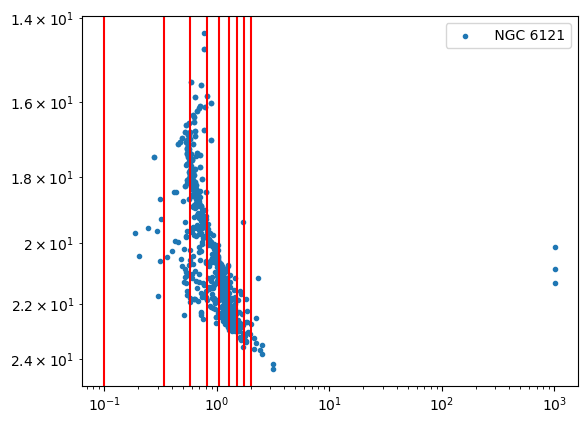

 NGC 6397


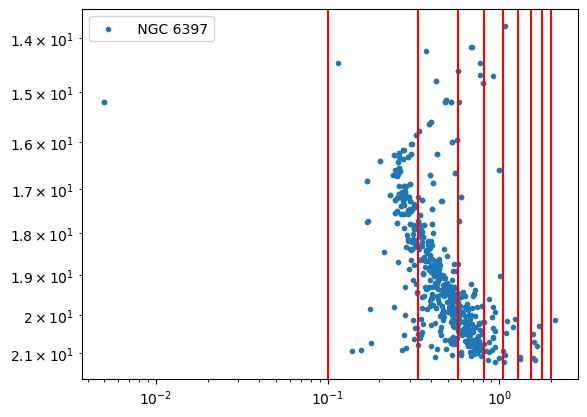

 NGC 6752


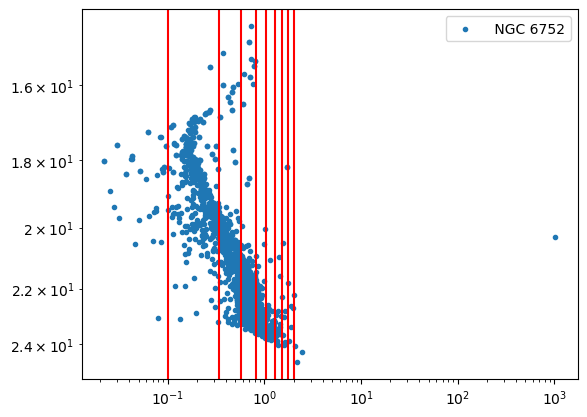

 NGC 5139


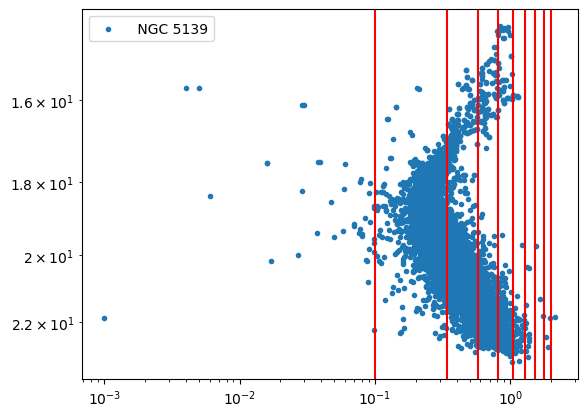

 NGC 4833


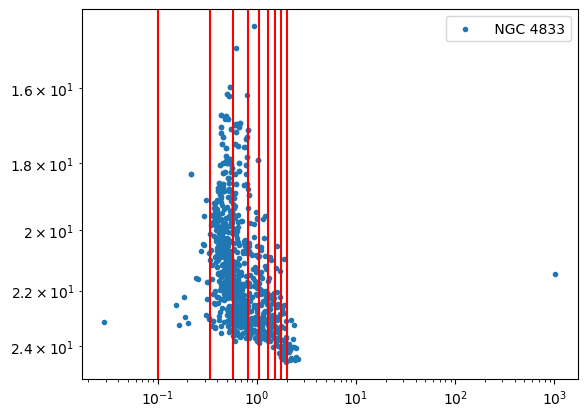

In [706]:

for dat in range(len(data_names)):
    tbl = Table(data=ascii.read(data_names[dat]), names=column_names)
    print(tbl.meta['comments'][12].split(':')[1])
    
    abscissa = tbl['f606w_TotMag'] - tbl['f814w_TotMag']
    ordinate = tbl['f606w_TotMag']
    shifted_ord = ordinate-mods_diff[dat]

    plt.gca().invert_yaxis()
    plt.scatter(abscissa, ordinate, marker='.', label=tbl.meta['comments'][12].split(':')[1])
    #plt.scatter(abscissa, shifted_ord, marker='.', label=tbl.meta['comments'][12].split(':')[1]+' shifted', color='red')
    plt.legend
    plt.xscale('log')
    plt.yscale('log')
    
    abs_ref = tbl_ref['f606w_TotMag'] - tbl_ref['f814w_TotMag']
    ord_ref = tbl_ref['f606w_TotMag']
    #plt.scatter(abs_ref, ord_ref, marker='.', label=tbl_ref.meta['comments'][12].split(':')[1])
    
    for gg in color_bins:
        plt.axvline(gg, color='red')
    
    #plot_colormag(tbl_ref, show=False)
    plt.legend()
   
    plt.show()

8. Go to the following web site and look-up the apparent distance modulus of your standard  reference cluster in the V-band. http://physwww.mcmaster.ca/%7Eharris/mwgc.dat 

In [707]:
# (m-M)V
modulus_apparent_NGC104 = 13.37
modulus_apparent_NGC104

13.37

In [708]:
dist_canon_NGC104 = 4.5*u.kpc # Reference Cluster
dist_canon_NGC104

<Quantity 4.5 kpc>

9. Use this apparent distance modulus to compute the distance moduli of all of the other  clusters in your dataset using the offsets determined in point 7 above. 

In [709]:
mods_calc = []

for dat in data_names:
    tbl = Table(data=ascii.read(dat), names=column_names)
    print(tbl.meta['comments'][12].split(':')[1])
    mA = magshift(tbl_ref)[1]#tbl_ref['f606w_TotMag']
    mB = magshift(tbl)[1]#tbl['f606w_TotMag']
    dist_modulus = mA - mB
    print(dist_modulus)
    mod = modulus_apparent_NGC104 - dist_modulus
    print(mod)
    print()
    mods_calc.append(mod)

 NGC 362
-0.4980716172206989
13.868071617220698

 NGC 6362
0.25619134262280596
13.113808657377193

 NGC 6218
0.31425305810397575
13.055746941896023

 NGC 6838
-0.17441524254962104
13.54441524254962

 NGC 3201
-0.5346623554298624
13.904662355429862

 NGC 6656
0.004748316945594411
13.365251683054405

 NGC 104
0.0
13.37

 NGC 6254
0.2912935145355071
13.078706485464492

 NGC 6809
0.09075413106534924
13.27924586893465

 NGC 6121
0.7146697247706406
12.655330275229359

 NGC 6397
2.1588415460764807
11.211158453923519

 NGC 6752
-0.11072490159375548
13.480724901593755

 NGC 5139
1.2164443638164677
12.153555636183532

 NGC 4833
-0.5075786412424321
13.877578641242431



10. Compare your apparent distance moduli for each cluster with those available at http://physwww.mcmaster.ca/%7Eharris/mwgc.dat. Make a plot illustrating this comparison.  Calculate statistics of your choice to provide a quantitative comparison of the distance  moduli. Comment on how well you did in your distance determinations.  

In [710]:
f = open('mwgc.dat.txt')
#print(f.read())
#f.readlines()

for line in f.readlines():
    if line.strip().startswith('ID'):
        print(line)
    if line.strip().startswith('NGC 4833'):
        print(line)
f.close()

   ID        Name           RA   (2000)   DEC         L       B     R_Sun  R_gc    X     Y     Z

 NGC 4833                12 59 33.92  -70 52 35.4   303.60   -8.02    6.6   7.0   3.6  -5.4  -0.9

   ID       [Fe/H] wt  E(B-V) V_HB (m-M)V V_t   M_V,t   U-B   B-V   V-R   V-I  spt   ellip

 NGC 4833    -1.85  4   0.32 15.60 15.08  6.91  -8.17   0.29  0.93  0.63  1.33  F3    0.07

    ID         v_r   +/-    v_LSR    sig_v  +/-    c        r_c   r_h    mu_V   rho_0 lg(tc) lg(th)

 NGC 4833     200.2   1.2   192.9                 1.25      1.00  2.41   18.48   3.00   8.78  9.42



In [711]:
modulus_canon_NGC362  = 14.83
modulus_canon_NGC6362 = 14.68
modulus_canon_NGC6218 = 14.01
modulus_canon_NGC6838 = 13.80
modulus_canon_NGC3201 = 14.20
modulus_canon_NGC6656 = 13.60
modulus_canon_NGC104  = 13.37
modulus_canon_NGC6254 = 14.08
modulus_canon_NGC6809 = 13.89
modulus_canon_NGC6121 = 12.82
modulus_canon_NGC6397 = 12.37
modulus_canon_NGC6752 = 13.13
modulus_canon_NGC5139 = 13.94
modulus_canon_NGC6838 = 13.80
modulus_canon_NGC4833 = 15.08

mods_canon = [
    modulus_canon_NGC362 ,
    modulus_canon_NGC6362,
    modulus_canon_NGC6218,
    modulus_canon_NGC6838,
    modulus_canon_NGC3201,
    modulus_canon_NGC6656,
    modulus_canon_NGC104 ,
    modulus_canon_NGC6254,
    modulus_canon_NGC6809,
    modulus_canon_NGC6121,
    modulus_canon_NGC6397,
    modulus_canon_NGC6752,
    modulus_canon_NGC5139,
    #modulus_canon_NGC6838,
    modulus_canon_NGC4833
]

In [712]:
ii = 0
for dat in data_names:
    tbl = Table(data=ascii.read(dat), names=column_names)
    print(tbl.meta['comments'][12].split(':')[1])
    print('Accepted Distance Modulus:', mods_canon[ii])
    print('Calculated Distance Modulus:', mods_calc[ii])
    perc = 100*np.abs(mods_canon[ii]-mods_calc[ii])/mods_canon[ii]
    print('Percent Error:', perc)
    print()
    
    ii+=1

 NGC 362
Accepted Distance Modulus: 14.83
Calculated Distance Modulus: 13.868071617220698
Percent Error: 6.486368056502373

 NGC 6362
Accepted Distance Modulus: 14.68
Calculated Distance Modulus: 13.113808657377193
Percent Error: 10.668878355741189

 NGC 6218
Accepted Distance Modulus: 14.01
Calculated Distance Modulus: 13.055746941896023
Percent Error: 6.811228109236091

 NGC 6838
Accepted Distance Modulus: 13.8
Calculated Distance Modulus: 13.54441524254962
Percent Error: 1.8520634597853656

 NGC 3201
Accepted Distance Modulus: 14.2
Calculated Distance Modulus: 13.904662355429862
Percent Error: 2.079842567395336

 NGC 6656
Accepted Distance Modulus: 13.6
Calculated Distance Modulus: 13.365251683054405
Percent Error: 1.7260905657764327

 NGC 104
Accepted Distance Modulus: 13.37
Calculated Distance Modulus: 13.37
Percent Error: 0.0

 NGC 6254
Accepted Distance Modulus: 14.08
Calculated Distance Modulus: 13.078706485464492
Percent Error: 7.111459620280597

 NGC 6809
Accepted Distance Mo

Text(0, 0.5, 'Calculated Distance Modulus')

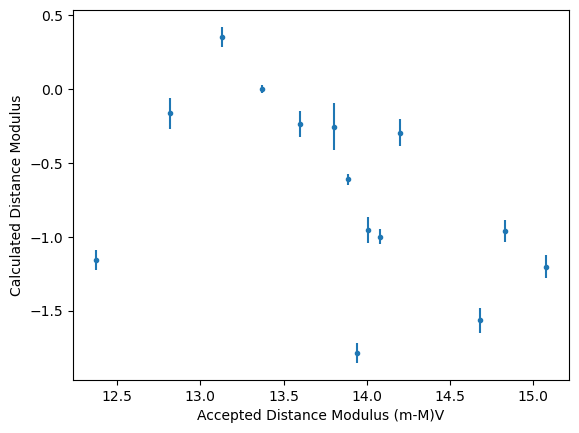

In [713]:
plt.errorbar(mods_canon, np.subtract(mods_calc,mods_canon), yerr=mods_diff_err, fmt='.')
plt.xlabel('Accepted Distance Modulus (m-M)V')
plt.ylabel('Calculated Distance Modulus')

11. Does the difference between your distance moduli and the actual values correlate with  some other cluster parameter such as metallicity or reddening? Plot your distance moduli  differences against the reddening for each cluster. What kind of overall behavior do you  see? How do you interpret this behavior?

In [714]:
cluster_names = []
for dat in data_names:
    tbl = Table(data=ascii.read(dat), names=column_names)
    print(tbl.meta['comments'][12].split(':')[1])
    cluster_names.append(tbl.meta['comments'][12].split(':')[1].strip())

 NGC 362
 NGC 6362
 NGC 6218
 NGC 6838
 NGC 3201
 NGC 6656
 NGC 104
 NGC 6254
 NGC 6809
 NGC 6121
 NGC 6397
 NGC 6752
 NGC 5139
 NGC 4833


In [715]:
# Foreground Reddening E(B-V)
f = open('mwgc.dat.txt')
#print(f.read())
#f.readlines()

for line in f.readlines():
    if line.strip().startswith('ID'):
        print(line)
    for name in cluster_names:
        if line.strip().startswith(name):
            print(line)
    #if line.strip().startswith('NGC 4833'):
     #   print(line)
f.close()

   ID        Name           RA   (2000)   DEC         L       B     R_Sun  R_gc    X     Y     Z

 NGC 104    47 Tuc       00 24 05.67  -72 04 52.6   305.89  -44.89    4.5   7.4   1.9  -2.6  -3.1

 NGC 362                 01 03 14.26  -70 50 55.6   301.53  -46.25    8.6   9.4   3.1  -5.1  -6.2

 NGC 3201                10 17 36.82  -46 24 44.9   277.23    8.64    4.9   8.8   0.6  -4.8   0.7

 NGC 4833                12 59 33.92  -70 52 35.4   303.60   -8.02    6.6   7.0   3.6  -5.4  -0.9

 NGC 5139   omega Cen    13 26 47.24  -47 28 46.5   309.10   14.97    5.2   6.4   3.1  -3.9   1.3

 NGC 6121   M 4          16 23 35.22  -26 31 32.7   350.97   15.97    2.2   5.9   2.1  -0.3   0.6

 NGC 6218   M 12         16 47 14.18  -01 56 54.7    15.72   26.31    4.8   4.5   4.2   1.2   2.1

 NGC 6254   M 10         16 57 09.05  -04 06 01.1    15.14   23.08    4.4   4.6   3.9   1.1   1.7

 NGC 6362                17 31 54.99  -67 02 54.0   325.55  -17.57    7.6   5.1   6.0  -4.1  -2.3

 NGC 6397  

In [716]:
#dist_canon_NGC104
dist_canon_NGC104  = 4.5*u.kpc
dist_canon_NGC362  = 8.6*u.kpc
dist_canon_NGC3201 = 4.9*u.kpc
dist_canon_NGC4833 = 6.6*u.kpc
dist_canon_NGC5139 = 5.2*u.kpc
dist_canon_NGC6121 = 2.2*u.kpc
dist_canon_NGC6218 = 4.8*u.kpc
dist_canon_NGC6254 = 4.4*u.kpc
dist_canon_NGC6362 = 7.6*u.kpc
dist_canon_NGC6397 = 2.3*u.kpc
dist_canon_NGC6656 = 3.2*u.kpc
dist_canon_NGC6752 = 4.0*u.kpc
dist_canon_NGC6809 = 5.4*u.kpc
dist_canon_NGC6838 = 4.0*u.kpc

distances_canon = [
                    dist_canon_NGC362 ,
                    dist_canon_NGC6362,
                    dist_canon_NGC6218,
                    dist_canon_NGC6838,
                    dist_canon_NGC3201,
                    dist_canon_NGC6656,
                    dist_canon_NGC104 ,
                    dist_canon_NGC6254,
                    dist_canon_NGC6809,
                    dist_canon_NGC6121,
                    dist_canon_NGC6397,
                    dist_canon_NGC6752,
                    dist_canon_NGC5139,
                    dist_canon_NGC4833
                    ]

In [717]:
#   ID       [Fe/H] 
metal_NGC104  = -0.72 
metal_NGC362  = -1.26 
metal_NGC3201 = -1.59 
metal_NGC4833 = -1.85 
metal_NGC5139 = -1.53 
metal_NGC6121 = -1.16 
metal_NGC6218 = -1.37 
metal_NGC6254 = -1.56 
metal_NGC6362 = -0.99 
metal_NGC6397 = -2.02 
metal_NGC6656 = -1.70 
metal_NGC6752 = -1.54 
metal_NGC6809 = -1.94 
metal_NGC6838 = -0.78 

metallicity_canon = [
                    metal_NGC362 ,
                    metal_NGC6362,
                    metal_NGC6218,
                    metal_NGC6838,
                    metal_NGC3201,
                    metal_NGC6656,
                    metal_NGC104 ,
                    metal_NGC6254,
                    metal_NGC6809,
                    metal_NGC6121,
                    metal_NGC6397,
                    metal_NGC6752,
                    metal_NGC5139,
                    metal_NGC4833
                    ]

In [718]:
#  ID     E(B-V)
red_NGC104  = 0.04
red_NGC362  = 0.05
red_NGC3201 = 0.24
red_NGC4833 = 0.32
red_NGC5139 = 0.12
red_NGC6121 = 0.35
red_NGC6218 = 0.19
red_NGC6254 = 0.28
red_NGC6362 = 0.09
red_NGC6397 = 0.18
red_NGC6656 = 0.34
red_NGC6752 = 0.04
red_NGC6809 = 0.08
red_NGC6838 = 0.25

reddening_canon = [
                    red_NGC362 ,
                    red_NGC6362,
                    red_NGC6218,
                    red_NGC6838,
                    red_NGC3201,
                    red_NGC6656,
                    red_NGC104 ,
                    red_NGC6254,
                    red_NGC6809,
                    red_NGC6121,
                    red_NGC6397,
                    red_NGC6752,
                    red_NGC5139,
                    #red_NGC6838,
                    red_NGC4833
                    ]

In [732]:
def lin_fit(x, m, b):
    return np.multiply(m, x) + b

Slope: -0.30148776220808093


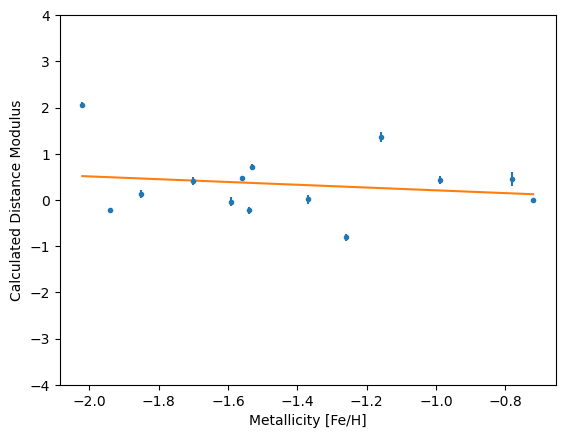

In [742]:
plt.errorbar(metallicity_canon, mods_diff, yerr=mods_diff_err, fmt='.')
fit_lin = curve_fit(lin_fit, metallicity_canon, mods_diff)[0]
plt.plot(np.linspace(np.min(metallicity_canon), np.max(metallicity_canon)), lin_fit(np.linspace(np.min(metallicity_canon), np.max(metallicity_canon)), fit_lin[0], fit_lin[1]))
plt.ylim(bottom=-4, top=4)
plt.xlabel('Metallicity [Fe/H]')
plt.ylabel('Calculated Distance Modulus')
print('Slope:', fit_lin[0])

Slope: 2.6488211865612348


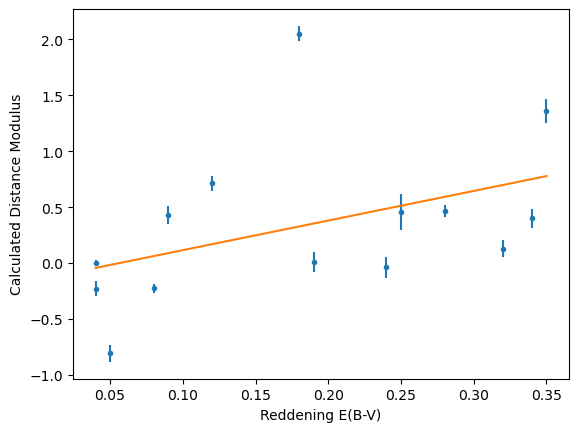

In [743]:
plt.errorbar(reddening_canon, mods_diff, yerr=mods_diff_err, fmt='.')
fit_lin = curve_fit(lin_fit, reddening_canon, mods_diff)[0]
plt.plot(np.linspace(np.min(reddening_canon), np.max(reddening_canon)), lin_fit(np.linspace(np.min(reddening_canon), np.max(reddening_canon)), fit_lin[0], fit_lin[1]))
#plt.ylim(bottom=-4, top=4)
plt.xlabel('Reddening E(B-V)')
plt.ylabel('Calculated Distance Modulus')
#plt.xlim(left=np.min(reddening_canon), right=np.max(reddening_canon))
print('Slope:', fit_lin[0])

In [731]:
fit_lin

array([ 2.64882119, -0.14916741])

## Part 2: Globular Cluster Isochrones Fitting and Age Determination

Go to the website that has the Dartmouth Stellar Evolution Models http://stellar.dartmouth.edu/models/isolf_new.html.

1.  Download the appropriate isochrones at different ages to produce a CMD fit to each of  the globular clusters from Part I to determine their ages. Make sure to choose the  appropriate [Fe/H] metallicity for each cluster from the literature or Simbad, as well as  the colors from HST/WFPC2. You can choose the Helium abundance ratio to be Y=0.33  and [$\alpha$/Fe]=+0.20. Make sure to construct the axes properly and to join the points with a  line.  
Chose Y=0.245+1.5*Z and [$\alpha$/Fe]=+0.20

Text(0.5, 1.0, 'Y: 0.3300 [Fe/H]: -0.72 [a/Fe]: 0.40')

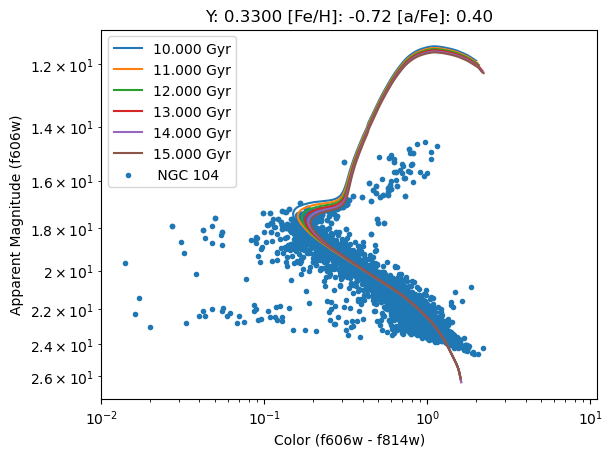

In [749]:
# 'F814W;F606W'

## For NGC 104
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC104/tmp1670451953.iso')
col_names = data=ascii.read(data_iso[0]).meta['comments'][8].split()
tbl = Table(data=ascii.read(data_iso[0]), names=col_names)

mark = ascii.read(data_iso[0]).meta['comments'][2].split()
vals = ascii.read(data_iso[0]).meta['comments'][3].split()

ii = 0
for line in (ascii.read(data_iso[0]).meta['comments']):
    if line.startswith('AGE'):
        eeps = int(line.split('=')[2])
        iso = tbl[ii:ii+eeps]
        
        v_band = iso['F606W'] - 0.044 + 5*np.log10(dist_canon_NGC104.to(u.pc).value) - 5 + 3.1*(1)*red_NGC104
        i_band = iso['F814W'] + 0.309 + 5*np.log10(dist_canon_NGC104.to(u.pc).value) - 5 + 3.1*(0.482)*red_NGC104
        
        color = v_band - i_band
        
        # m - M = 5 log_10(d) - 5
        # m = M + 5 log_10(d) - 5
        #A_red = 3.1*(1)*red_NGC104
        #mag = iso['F606W'] - 0.044 + 5*np.log10(dist_canon_NGC104.to(u.pc).value) - 5 + A_red
        #iso['F606W'] + 5*np.log10(dist_canon_NGC104.to(u.pc).value) - 5 + A_red
        age = line.split('=')[1].split()[0] + ' Gyr'
        plt.plot(color, v_band, label=age)
        plt.yscale('log')
        plt.xscale('log')
        
        ii += eeps
        #plt.show()
        #print(eeps)
tblr = Table(data=ascii.read(data_names[6]), names=column_names)
plot_colormag(tbl=tblr, show=False)
plt.title(mark[1] + ': ' + vals[1] + ' ' + mark[4] + ': ' + vals[4] + ' ' + mark[5] + ': ' + vals[5])

#tbl[276:276+268]

In [ ]:
#int(ascii.read('/mnt/c/Users/panda/Documents/Stars/isochrone_data/tmp1670449043.iso').meta['comments'][9].split()[2].split('=')[1])

In [35]:
def fit_isochrone(data_iso, reddening, distance): 
    col_names = data=ascii.read(data_iso[0]).meta['comments'][8].split()
    tbl = Table(data=ascii.read(data_iso[0]), names=col_names)
    
    mark = ascii.read(data_iso[0]).meta['comments'][2].split()
    vals = ascii.read(data_iso[0]).meta['comments'][3].split()
    
    ii = 0
    for line in (ascii.read(data_iso[0]).meta['comments']):
        if line.startswith('AGE'):
            eeps = int(line.split('=')[2])
            iso = tbl[ii:ii+eeps]
            
            v_band = iso['F606W'] - 0.044 + 5*np.log10(distance.to(u.pc).value) - 5 + 3.1*(1)*reddening
            i_band = iso['F814W'] + 0.309 + 5*np.log10(distance.to(u.pc).value) - 5 + 3.1*(0.482)*reddening
            
            color = v_band - i_band
    
            age = line.split('=')[1].split()[0] + ' Gyr'
            plt.plot(color, v_band, label=age)
            plt.yscale('log')
            plt.xscale('log')
            
            ii += eeps
    
    plt.title(mark[1] + ': ' + vals[1] + ' ' + mark[4] + ': ' + vals[4] + ' ' + mark[5] + ': ' + vals[5])

In [36]:
cluster_names

['NGC 362',
 'NGC 6362',
 'NGC 6218',
 'NGC 6838',
 'NGC 3201',
 'NGC 6656',
 'NGC 104',
 'NGC 6254',
 'NGC 6809',
 'NGC 6121',
 'NGC 6397',
 'NGC 6752',
 'NGC 5139',
 'NGC 4833']

In [768]:
## NGC 362
metal_NGC362

-1.26

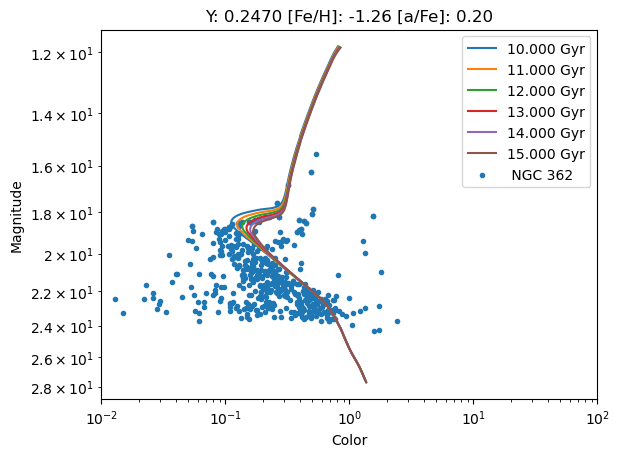

In [38]:
## NGC 362
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC362/tmp1670514271.iso')
reddening = red_NGC362
distance = dist_canon_NGC362
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[0]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [750]:
## NGC 6362
metal_NGC6362

-0.99

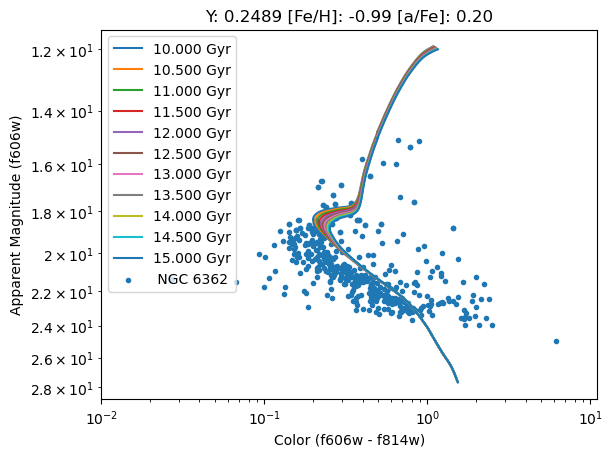

In [751]:
## NGC 6362
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6362/tmp1670624916.iso')
reddening = red_NGC6362
distance = dist_canon_NGC6362
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[1]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [752]:
## NGC 6218
metal_NGC6218

-1.37

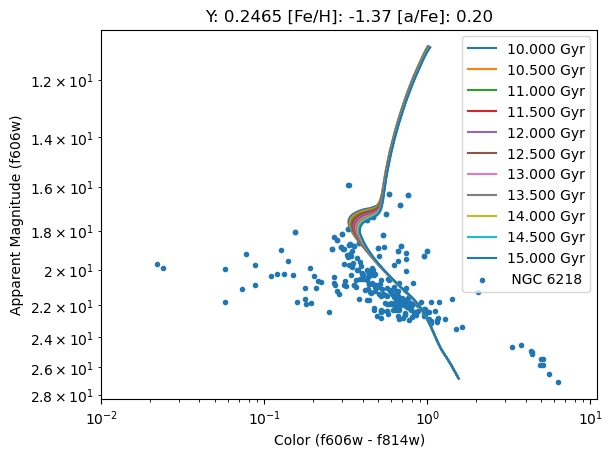

In [753]:
## NGC 6218
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6218/tmp1670625108.iso')
reddening = red_NGC6218
distance = dist_canon_NGC6218
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[2]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [754]:
## NGC 6838
metal_NGC6838

-0.78

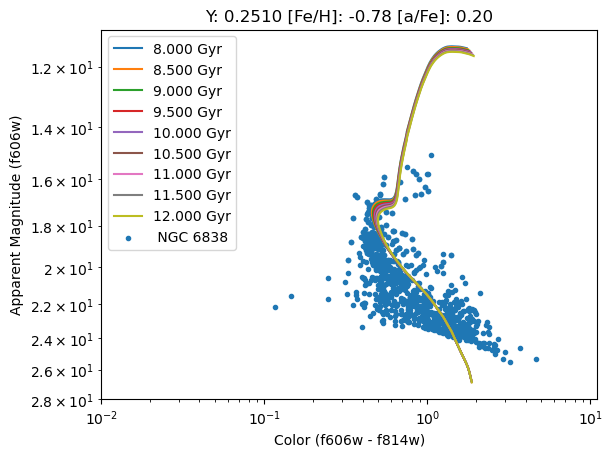

In [756]:
## NGC 6838
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6838/tmp1670625302.iso')
reddening = red_NGC6838
distance = dist_canon_NGC6838
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[3]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [769]:
## NGC 3201
metal_NGC3201

-1.59

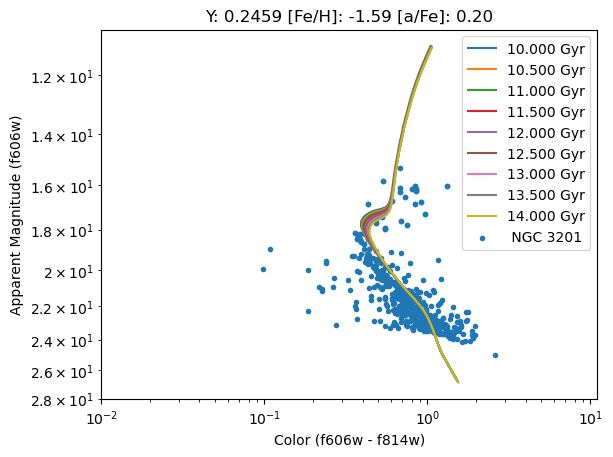

In [770]:
# NGC 3201
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC3201/tmp1670625893.iso')
reddening = red_NGC3201
distance = dist_canon_NGC3201
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[4]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [759]:
## NGC 6656
metal_NGC6656

-1.7

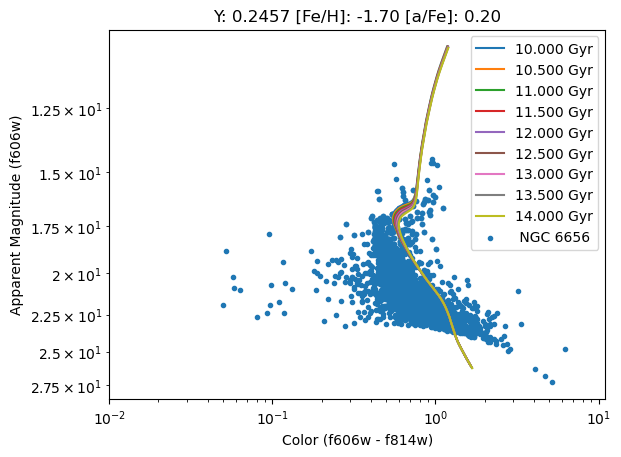

In [771]:
# NGC 6656
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6656/tmp1670625985.iso')
reddening = red_NGC6656
distance = dist_canon_NGC6656
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[5]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [44]:
## NGC 104
metal_NGC104

-0.72

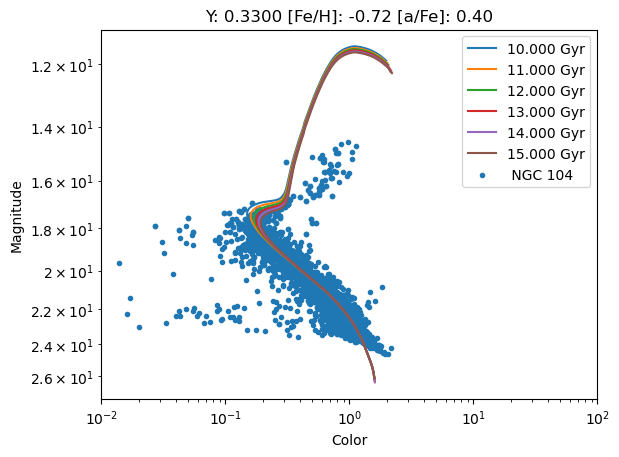

In [45]:
# NGC 104
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC104/tmp1670451953.iso')
reddening = red_NGC104
distance = dist_canon_NGC104
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[6]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [760]:
## NGC 6254
metal_NGC6254

-1.56

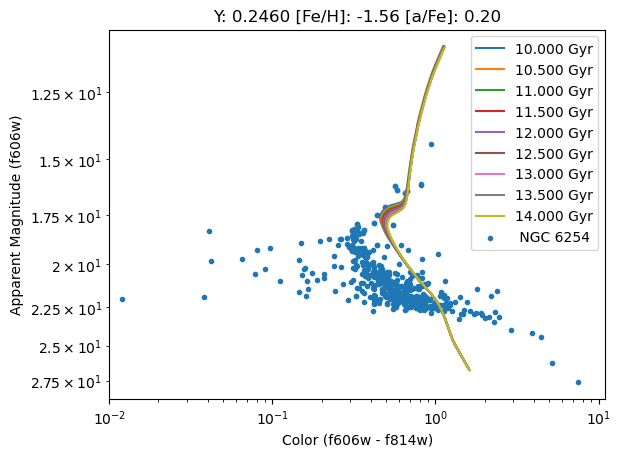

In [772]:
# NGC 6254
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6254/tmp1670626067.iso')
reddening = red_NGC6254
distance = dist_canon_NGC6254
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[7]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [761]:
## NGC 6809
metal_NGC6809

-1.94

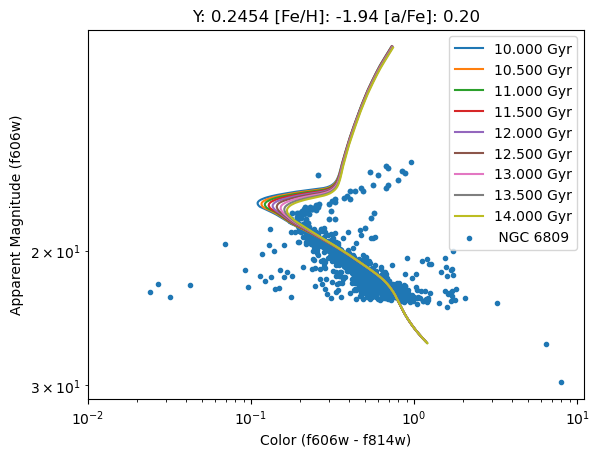

In [773]:
# NGC 6809
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6809/tmp1670626173.iso')
reddening = red_NGC6809
distance = dist_canon_NGC6809
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[8]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [762]:
## NGC 6121
metal_NGC6121

-1.16

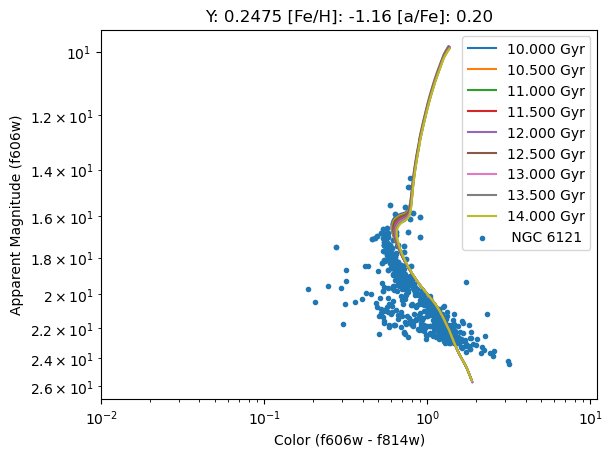

In [774]:
# NGC 6121
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6121/tmp1670626298.iso')
reddening = red_NGC6121
distance = dist_canon_NGC6121
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[9]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [763]:
## NGC 6397
metal_NGC6397

-2.02

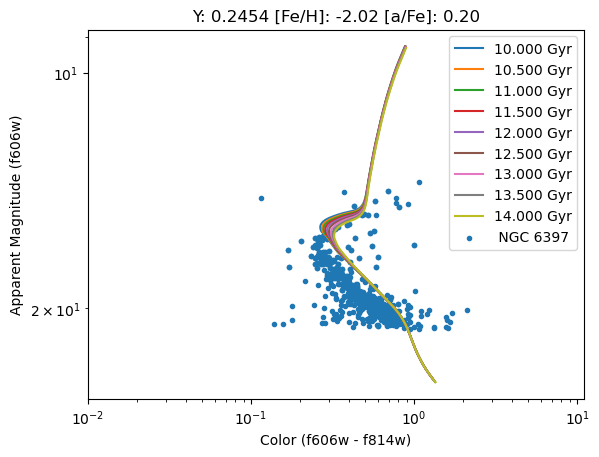

In [775]:
# NGC 6397
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6397/tmp1670626387.iso')
reddening = red_NGC6397
distance = dist_canon_NGC6397
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[10]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [764]:
## NGC 6752
metal_NGC6752

-1.54

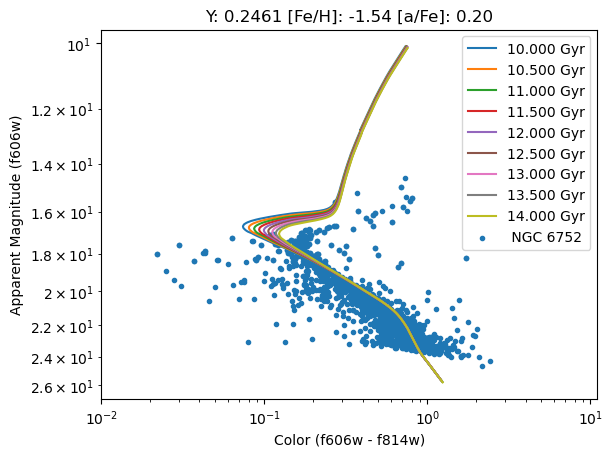

In [776]:
# NGC 6752
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6752/tmp1670626463.iso')
reddening = red_NGC6752
distance = dist_canon_NGC6752
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[11]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [765]:
## NGC 5139
metal_NGC5139

-1.53

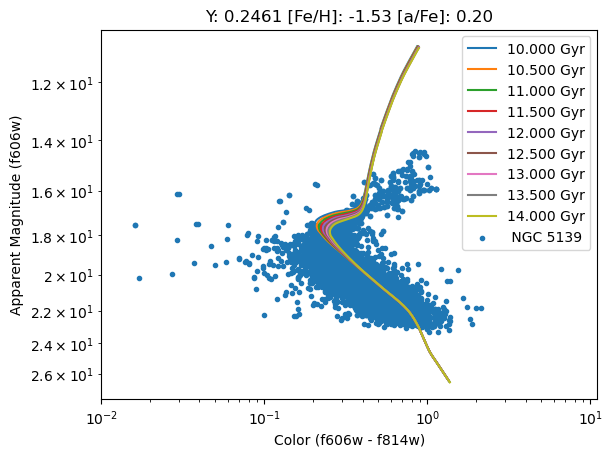

In [777]:
# NGC 5139
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC5139/tmp1670626837.iso')
reddening = red_NGC5139
distance = dist_canon_NGC5139
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[12]), names=column_names)
plot_colormag(tbl=tblr, show=False)

In [767]:
## NGC 4833
metal_NGC4833

-1.85

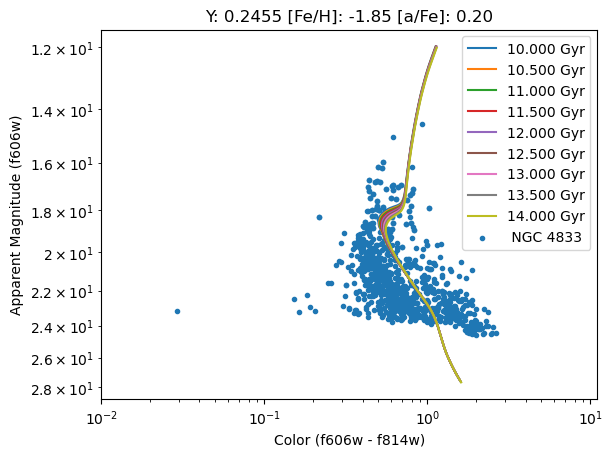

In [778]:
# NGC 4833
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC4833/tmp1670626913.iso')
reddening = red_NGC4833
distance = dist_canon_NGC4833
fit_isochrone(data_iso, reddening, distance)
tblr = Table(data=ascii.read(data_names[13]), names=column_names)
plot_colormag(tbl=tblr, show=False)

2.  Present your determined ages for each cluster in a table, with the appropriate  parameters for each. Comment on whether you are able to find an age-metallicity  relation for Globular clusters.


In [53]:
ages = []

In [54]:
names = ['Cluster Name', 'Distance Modulus (calculated)', 'Distance Modulus (accepted)', '[Fe/H]', 'E(B-V)', 'Age', 'Distance']
Table([cluster_names, mods_calc, mods_canon, metallicity_canon, reddening_canon, ages, distances_canon])

ValueError: Inconsistent data column lengths: {0, 14}

In [ ]:
dist_math = np.zeros((len(data_names), 2))*u.kpc
i=0
for dat in data_names:
    tbl = Table(data=ascii.read(dat), names=column_names)
    tes = magshift(tbl)
    
    mA = ref_magshift[1]
    mB = tes[1]
    shift = mA - mB
    #print(mA, mB, shift, dist_modulus(mA, mB, dist_ref))
    print(tbl.meta['comments'][12].split(':')[1])
    dist = 10**((tes[1] - ref_magshift[1])/5.)*dist_ref
    #print(dist)
    #ref_magshift[2]
    #tes[2]
    #dist_ref_err
    # error of x - y is sqrt(x^2 + y^2)
    one = np.sqrt(ref_magshift[2]**2+tes[2]**2)
    # error of z=x/y is dz = sqrt((dx/x)^2 + (dy/y)^2)*z
    two = one / 5.
    # error of 10^(x) is ln(10)*10^x*dx
    three = np.log(10)*10**((tes[1] - ref_magshift[1])/5.)*two
    # error of z=x*y is dz = sqrt((dx/x)^2 + (dy/y)^2)*z
    four = np.sqrt((three/(10**((tes[1] - ref_magshift[1])/5.)))**2+(dist_ref_err/dist_ref)**2)*10**((tes[1] - ref_magshift[1])/5.)*dist_ref
    print(shift, dist, '+-', four)
    #tbl['Distance'] = dist
    #tbl['Distance_Error'] = four
    dist_math[int(i)][0] = dist#.value
    dist_math[int(i)][1] = four#.value
    
    i+=1
    #tbl.write(dat, format='ascii')

In [ ]:
dist_canon_E3      = 8.1*u.kpc
dist_canon_NGC362  = 8.6*u.kpc
dist_canon_NGC6362 = 5.1*u.kpc
dist_canon_NGC6218 = 4.8*u.kpc
dist_canon_NGC6838 = 4.0*u.kpc
dist_canon_NGC3201 = 4.9*u.kpc
dist_canon_NGC6656 = 3.2*u.kpc
dist_canon_NGC104  = 4.5*u.kpc
dist_canon_NGC6254 = 4.4*u.kpc
dist_canon_NGC6809 = 5.4*u.kpc
dist_canon_NGC6121 = 2.2*u.kpc
dist_canon_NGC6397 = 2.3*u.kpc
dist_canon_NGC6752 = 7.9*u.kpc
dist_canon_NGC5139 = 5.2*u.kpc
dist_canon_NGC6838 = 4.0*u.kpc
dist_canon_NGC4833 = 6.6*u.kpc

dist_canon = [dist_canon_E3,     
              dist_canon_NGC362, 
              dist_canon_NGC6362,
              dist_canon_NGC6218,
              dist_canon_NGC6838,
              dist_canon_NGC3201,
              dist_canon_NGC6656,
              dist_canon_NGC104, 
              dist_canon_NGC6254,
              dist_canon_NGC6809,
              dist_canon_NGC6121,
              dist_canon_NGC6397,
              dist_canon_NGC6752,
              dist_canon_NGC5139,
              dist_canon_NGC6838,
              dist_canon_NGC4833
             ]

In [ ]:
for d in range(len(dist_canon)):
    dat = data_names[d]
    tbl = Table(data=ascii.read(dat), names=column_names)
    print(tbl.meta['comments'][12].split(':')[1])
    print('Accepted Distance', dist_canon[d])
    print('Calculated Distance:', dist_math[d][0])
    perc = np.abs(dist_canon[d] - dist_math[d][0])/dist_canon[d]*100
    print('Percent Error:', perc)
    print()
with quantity_support():
    plt.errorbar(dist_canon*u.kpc, dist_math[:,0], yerr=dist_math[:,1], fmt='.')
    plt.xlabel('Accepted Distance')
    plt.ylabel('Calculated Distance')